In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [68]:
df = pd.read_csv('/content/titanic.csv')
df = df.dropna()

In [69]:
df.shape

(183, 12)

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


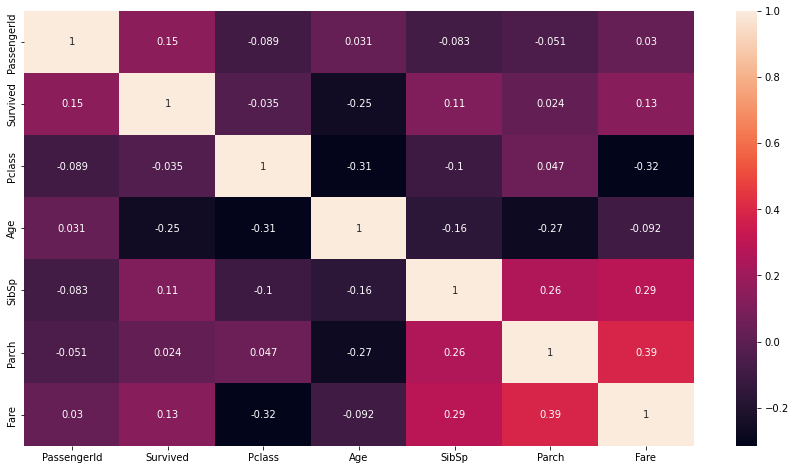

In [72]:
x = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(x,annot = True)

From the heatmap,we can see that these features combined play a significant role in predicting the survival and hence should be used.

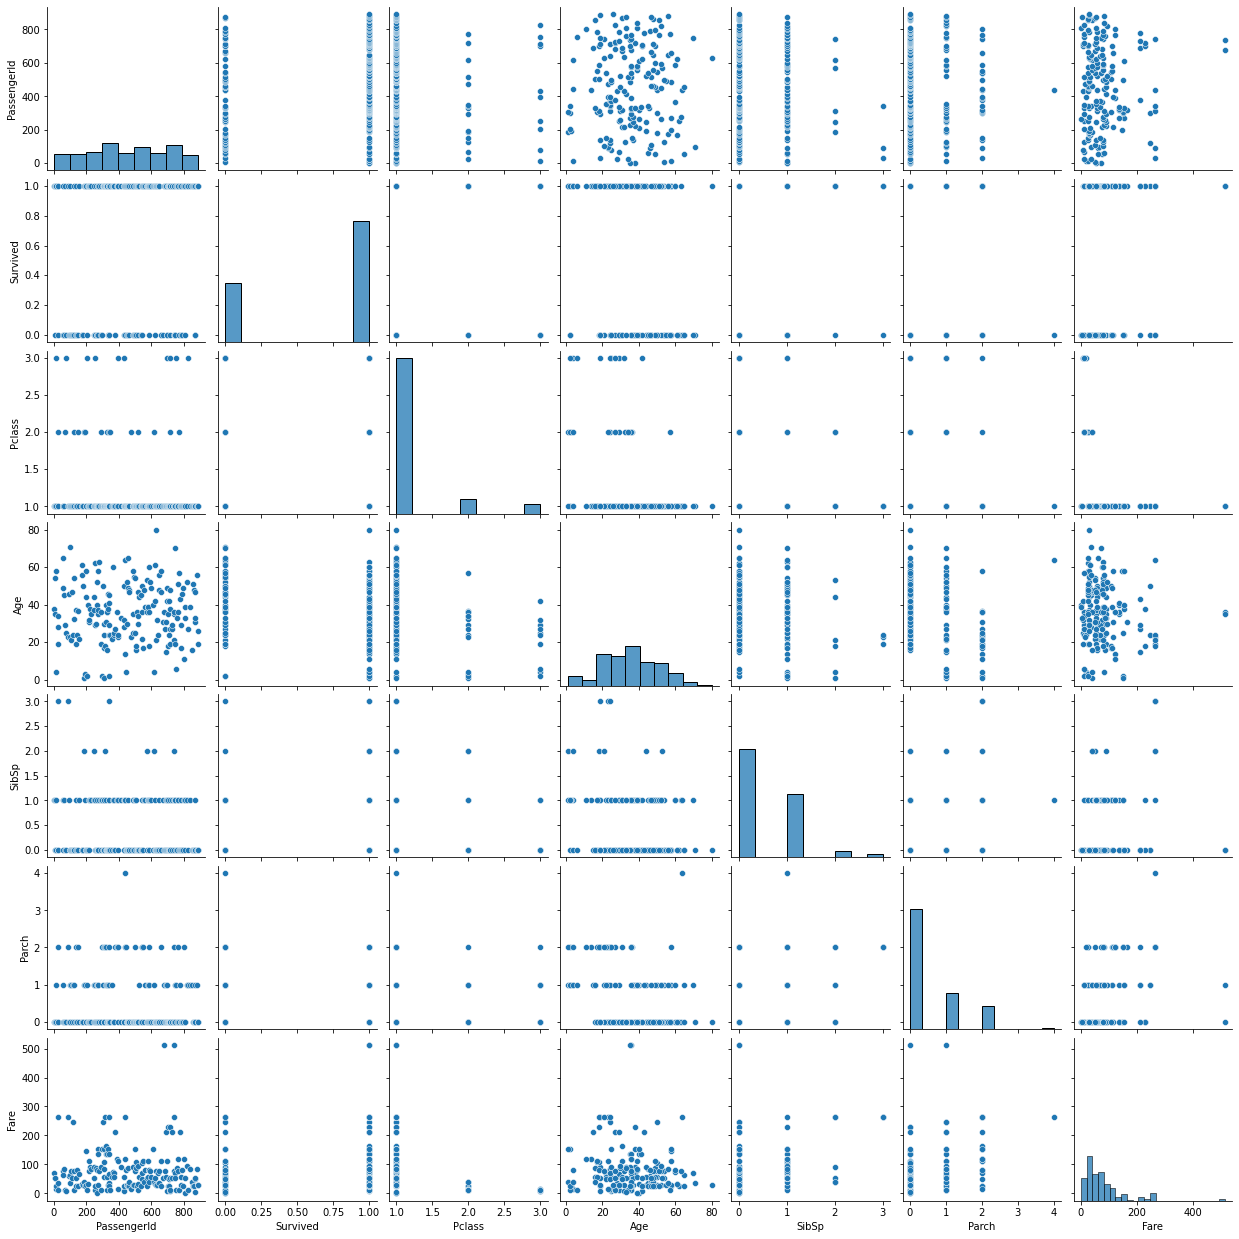

In [73]:
sns.pairplot(df)
plt.show()

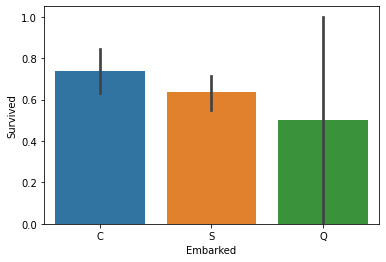

In [74]:
#these functions help select features that help predict the target
sns.barplot(data=df,x='Embarked',y='Survived')
plt.show()

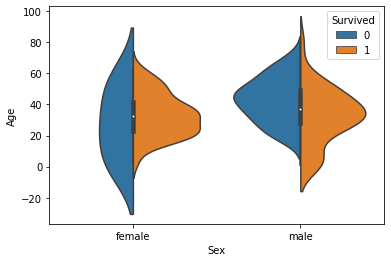

In [75]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = df, split = True)

In [76]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
df.iloc[:,4]=labelEncoder.fit_transform(df.iloc[:,4].values)


In [77]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare']].to_numpy()
Y = df[['Survived']].to_numpy()

In [78]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
X_scaled[0]

array([-0.37225618, -1.03901177,  0.14906507,  0.83362754, -0.63172982,
       -0.0971798 ])

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,shuffle=True,random_state=2, stratify=Y)

In [81]:
model.fit(X_train,Y_train)
preds = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
print("Accuracy:",accuracy_score(Y_test,preds))

Accuracy: 0.7837837837837838


In [83]:
print("Precision:",precision_score(Y_test,preds))

Precision: 0.8148148148148148


In [84]:
print("Recall",recall_score(Y_test,preds))

Recall 0.88


In [85]:
print("F1-Score",f1_score(Y_test,preds))

F1-Score 0.8461538461538461


In [86]:
print("Confusion Matrix:\n",confusion_matrix(Y_test,preds))

Confusion Matrix:
 [[14 10]
 [ 6 44]]


In [87]:
print("error rate:",(1-accuracy_score(Y_test,preds)))

error rate: 0.21621621621621623


In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [89]:
new_data = [1,1,54.0,0,0,71.28]
predicted1= model.predict([new_data]) 
print ("Predicted Value:", predicted1)
print ("Survived: Yes" if predicted1 else "Survived: No")


Predicted Value: [0]
Survived: No


In logistic regression, the outcome variable is a categorical variable. In a simple logistic regression model, the outcome is simply yes or no (or 1 or 0), a dichotomous variable. It predicts the probability of an event happening or not happening. If you know the probability of an event happening, you automatically know the probability of that event not happening.

In other words, logistic regression deals with the odds of an event.


In [92]:
roc_score = roc_auc_score(Y_test,preds)
roc_score


0.7316666666666666

In [93]:
tpr, fpr, thresholds = roc_curve(Y_test, preds)


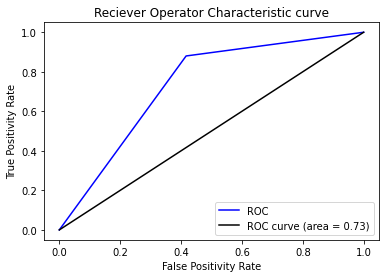

In [94]:
plt.plot(tpr, fpr, color = 'blue', label = 'ROC')
plt.plot([0,1],[0,1],color = 'black', label = 'ROC curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("Reciever Operator Characteristic curve")
plt.legend()
plt.show()

RESULT:
Accuracy of model is 78.37%
AUC is 0.73
THEREFORE MODEL HAS Moderate PERFORMANCE.